Code below does a grid search for optimal HMM values:


In [181]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
import glob
import sys

[sys.path.append(f) for f in glob.glob('../utils/*')]
from preprocess import DataStruct
from plotting_utils import figSize
from lineplots import plotsd
from session_utils import *
from recalibration_utils import *
from click_utils import *


def formatJobOutput(f):
    raw = np.load(f, allow_pickle = True)
    df  = pd.DataFrame([x.item() for x in raw])
    df  = df[['file', 'exp', 'inflection', 'kappa', 'score']]
    
    return df


def getSummaryStats(scores_df):
    return
    
    

SWEEP_DIR = '/oak/stanford/groups/shenoy/gwilson/nonstationarities/T5/HMMsweep/'


files     = glob.glob(SWEEP_DIR + '*')
scores    = [formatJobOutput(f) for f in files]
scores_df = pd.concat(scores)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
params      = ['kappa', 'inflection', 'exp']
unique_vals = dict([(x, np.unique(scores_df[x])) for x in params])
unique_lens = [len(np.unique(scores_df[x])) for x in params]
medscores   = np.zeros(unique_lens)

lens = list()
for i, kappa in enumerate(unique_vals['kappa']):
    for j, inflection in enumerate(unique_vals['inflection']):
        for k, exp in enumerate(unique_vals['exp']):
            subset             = scores_df.loc[(scores_df["kappa"] == kappa) & (scores_df["inflection"] == inflection) & (scores_df["exp"] == exp)]
            medscores[i, j, k] = np.median(subset['score'])
            lens.append(len(subset['score']))


In [188]:
len(scores[1])

98

In [183]:
nums = [int(x.split('ID_')[1].split('.npy')[0]) for x in files]

In [184]:
len(np.setdiff1d(np.arange(600), nums))

46

In [185]:
len(nums)

554

In [155]:
scores_df.drop_duplicates(inplace = True)

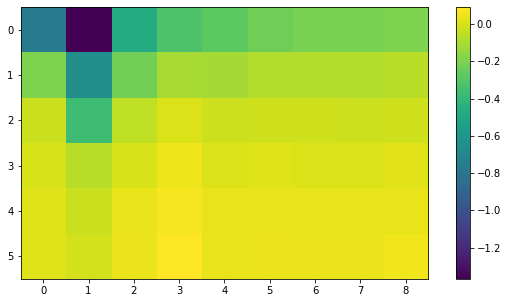

In [147]:
opt_kappa, opt_inflection, opt_exp = np.unravel_index(medscores.argmax(), medscores.shape)

plt.imshow(medscores[:, opt_inflection, :])
plt.colorbar()
plt.show()

In [190]:
unique_vals

{'exp': array([1.0e-04, 1.0e-03, 2.5e-02, 5.0e-02, 1.0e-01, 5.0e-01, 1.0e+00,
        2.0e+00, 4.0e+00]),
 'inflection': array([1.e-01, 1.e+01, 3.e+01, 5.e+01, 7.e+01, 1.e+02, 2.e+02, 4.e+02]),
 'kappa': array([0.5, 1. , 2. , 4. , 6. , 8. ])}

In [148]:
subset  = scores_df.loc[(scores_df["kappa"] == unique_vals['kappa'][opt_kappa]) & (scores_df["inflection"] == unique_vals['inflection'][opt_inflection]) & (scores_df["exp"] == unique_vals['exp'][opt_exp])]


In [149]:
import seaborn as sns

/home/users/ghwilson/.local/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


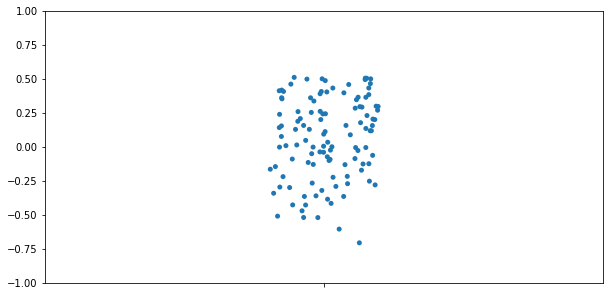

In [150]:
figSize(5, 10)
sns.stripplot(y = np.asarray(subset['score'] ), orient = 'h')
plt.ylim([-1, 1])
plt.show()

In [103]:
scores_df = pd.DataFrame(scores)

In [ ]:
import seaborn as sns
sns.swarmplot(y = scores_df['score'], x = scores_df['smoothing'], orient = 'v')

In [ ]:
import seaborn as sns 

medscores = np.median(scores, axis = 0)
args      = np.unravel_index(medscores.argmax(), medscores.shape)

print('Best weighting function: logistic with inflection = ', inflection_sweep[args[0]], ' exponent = ', exp_sweep[args[1]])
print('Best kappa: ', kappa_sweep[args[2]])
print('Best threshold: ', thresh_sweep[args[3]])

plt.subplot(1, 2, 1)
x = np.linspace(0, 400, 3000)
y = coef = 1 / (1 + np.exp(-1 * (x - inflection_sweep[args[0]]) * exp_sweep[args[1]]))

figSize(5, 10)
plt.plot(x, y)
plt.xlabel('Distance to target')
plt.ylabel('Kappa adjustment factor')
plt.title('Weighting function')

plt.subplot(1, 2, 2)
sns.swarmplot(data = scores[:, args[0], args[1], args[2], args[3]], orient = 'v')
plt.title('Session scores (best parameters)')
plt.ylabel('R^2 (new day)')

In [ ]:
kappa_sweep[args[0]]
kappa_sweep[args[0]]